In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class DataScaling:
    def simple_features_scaling(self, pData):
        max = np.max(pData)
        
        return pData / max 
    
    def min_max_scaling(self, pData):
        min = np.min(pData)
        max = np.max(pData)

        return (pData - min) / (max - min)
    

class Normalization:
    def standardization(self, pData):
        std = np.std(pData)
        mean = np.mean(pData)

        return (pData - mean) / std
    
    def mean_normal(self, pData):
        mean = np.mean(pData)
        max = np.max(pData)
        min = np.min(pData)

        return (pData - mean) / (max - min)

    def box_cox_normal(self, pData):
        ...

In [ ]:
class LogisticRegression:
    def __init__(self, pN_features) -> None:
        # Declare Wegihts and bias
        self.weights = None

        # Total number of features
        self.n_features = pN_features

        self.losses = []

        self.costs = []

    def initialize_param(self):
        # Init the random value for weights and bias
        self.weights = np.random.randn(self.n_features + 1, 1)

    def sigmoid(self, pX):
        return 1 / (1 + np.exp(-pX))
    
    def sigmoid_derivative(self, pX):
        a = self.sigmoid(pX)

        return a*(1-a)
    
    def compute_y_hat(self, pX):
        z = np.dot(pX, self.weights)

        return self.sigmoid(z)
    
    def compute_loss(self, y_hat, y):
       
        return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)), axis=0, dtype=np.float32, keepdims=True)[0]
    
    def gradient(self, pX, py, py_hat):
        
        return np.mean((pX * (py_hat - py)).T, axis=1, dtype=np.float32, keepdims=True)

    def update_weights(self, pLr, pGradient):

        self.weights = self.weights - pLr * pGradient

    def fit(self, pX, py, learning_rate=0.01, epoch=100, mini_batch=70):
        # Each vector in pX is row vector
        N = pX.shape[0]
        self.initialize_param()
        temp_dataset = np.concatenate((pX, py), axis=1)
        for e in range(epoch):
            cost = 0
            np.random.shuffle(temp_dataset)
            X_train = temp_dataset[:, :-1]
            y_train = temp_dataset[:, -1].reshape(-1, 1)
            for i in range(0, N, mini_batch):
                # Extract X and y from dataset
                x = X_train[i: i + mini_batch]
                y = y_train[i: i + mini_batch]

                y_hat = self.compute_y_hat(x)

                # Compute cost value for each loop
                cost += self.compute_loss(y_hat, y)
          
                theta = self.gradient(x, y, y_hat)
                theta = theta.reshape(self.n_features + 1, 1)

                # Update weights and bias
                self.update_weights(learning_rate, theta)
            # Append mean cost for each loop
            self.costs.append(mini_batch / N * cost)
    def get_loss(self):
        return self.losses
    
    def get_weights(self):
        return self.weights
    
    def plot_cost(self, pStart, pEnd):
        plt.figure()
        plt.plot(self.costs)
        plt.xlim(pStart, pEnd)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()

def pre_processing(pX, is_normalized=True):
    # Normalize the data with suitable value
    normalizer = Normalization()
    if is_normalized == True:
        pX = normalizer.mean_normal(pX)
    
    # Add one vector into X matrix
    pX = np.concatenate((np.ones((pX.shape[0],1)), pX), axis=1)

    return pX

df = pd.read_csv('data/and_problem.csv')
dataset = df.values
lr = 0.01
epoches = 50000
mini_batch = 1
is_splited = False
X_train = X_test = y_train = y_test = None
X = dataset[:, :-1]
y = dataset[:, -1].reshape(-1,1)

if is_splited == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, y_train = X, y
    X_test = y_test = [] 

logistic = LogisticRegression(X.shape[1])

# Pre processing data
X_train = pre_processing(X_train, is_normalized=False)
# X_test = pre_processing(X_test)
logistic.fit(X_train, y_train, learning_rate=lr, epoch=epoches, mini_batch=mini_batch)
logistic.plot_cost(0, epoches)

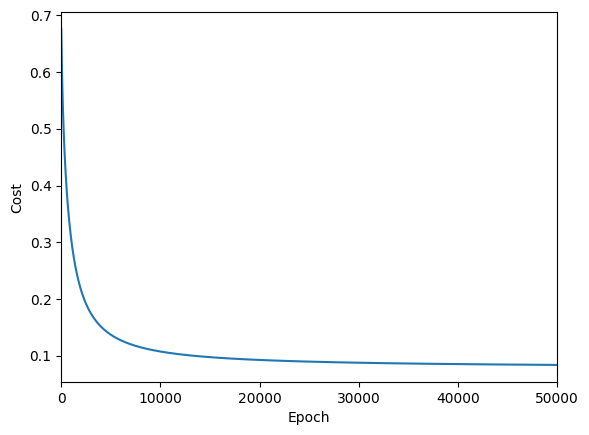

In [34]:
'''
    This example use complex decision boundary for classification
    The solution of XOR problem using logistic regression
'''

class LogisticRegression:
    def __init__(self, pN_features) -> None:
        # Declare Wegihts and bias
        self.weights = None

        # Total number of features
        self.n_features = pN_features

        self.losses = []

        self.costs = []

    def initialize_param(self):
        # Init the random value for weights and bias
        self.weights = np.random.randn(self.n_features, 1)

    # Initialize the input vector to suitable for formula in logistic regression
    def init_input_vetor(self, pX):
        return np.array([[x[0]**2, x[0]*x[1], x[1]**2] for x in pX])

    def sigmoid(self, pX):
        return 1 / (1 + np.exp(-pX))

    def sigmoid_derivative(self, pX):
        a = self.sigmoid(pX)

        return a*(1-a)

    def compute_y_hat(self, pX):
        z = np.dot(pX, self.weights) -1

        return self.sigmoid(z)

    def compute_loss(self, y_hat, y):

        return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)), axis=0, dtype=np.float32, keepdims=True)[0]

    def gradient(self, pX, py, py_hat):

        return np.mean((pX * (py_hat - py)).T, axis=1, dtype=np.float32, keepdims=True)

    def update_weights(self, pLr, pGradient):

        self.weights = self.weights - pLr * pGradient

    def fit(self, pX, py, learning_rate=0.01, epoch=100, mini_batch=70):
        # Each vector in pX is row vector
        N = pX.shape[0]
        self.n_features = 3
        pX = self.init_input_vetor(pX)
        self.initialize_param()
        temp_dataset = np.concatenate((pX, py), axis=1)
        for e in range(epoch):
            cost = 0
            np.random.shuffle(temp_dataset)
            X_train = temp_dataset[:, :-1]
            y_train = temp_dataset[:, -1].reshape(-1, 1)
            for i in range(0, N, mini_batch):
                # Extract X and y from dataset
                x = X_train[i: i + mini_batch]
                y = y_train[i: i + mini_batch]

                y_hat = self.compute_y_hat(x)

                # Compute cost value for each loop
                cost += self.compute_loss(y_hat, y)

                theta = self.gradient(x, y, y_hat)
                theta = theta.reshape(self.n_features, 1)

                # Update weights and bias
                self.update_weights(learning_rate, theta)
            # Append mean cost for each loop
            self.costs.append(mini_batch / N * cost)
    def get_loss(self):
        return self.losses

    def predict(self, pX):
        pX = self.init_input_vetor(pX)
        prob = self.compute_y_hat(pX)
        if prob[0] > 0.5:
            return 1
        else:
            return 0

    def get_weights(self):
        return self.weights

    def plot_cost(self, pStart, pEnd):
        plt.figure()
        plt.plot(self.costs)
        plt.xlim(pStart, pEnd)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()

def pre_processing(pX, is_normalized=True, is_concatenated=True):
    # Normalize the data with suitable value
    normalizer = Normalization()
    if is_normalized == True:
        pX = normalizer.mean_normal(pX)

    # Add one vector into X matrix
    if is_concatenated == True:
        pX = np.concatenate((np.ones((pX.shape[0],1)), pX), axis=1)

    return pX

df = pd.read_csv('data/xor_problem.csv')
dataset = df.values
lr = 0.01
epoches = 50000
mini_batch = 1
is_splited = False
X_train = X_test = y_train = y_test = None
X = dataset[:, :-1]
y = dataset[:, -1].reshape(-1,1)

if is_splited == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, y_train = X, y
    X_test = y_test = []

logistic = LogisticRegression(X.shape[1])

# Pre processing data
X_train = pre_processing(X_train, is_normalized=False, is_concatenated=False)
# X_test = pre_processing(X_test)

logistic.fit(X_train, y_train, learning_rate=lr, epoch=epoches, mini_batch=mini_batch)
logistic.plot_cost(0, epoches)

In [41]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/xor_problem.csv')
dataset = df.values
X = dataset[:,:-1]

x1 = np.arange(5).reshape(-1,1)
x2 = np.array([2,3,4,5,6]).reshape(-1,1)
x = np.concatenate((x1,x2),axis=1)

a = np.array([[xi[0]**2, xi[0]*xi[1], xi[1]**2] for xi in X])

logistic.predict([[0, 1]])

1